class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)[source]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Đường dẫn đến file CSV
csv_path = '/content/drive/MyDrive/KLTN/Model/Decision_Tree/asq_test.csv'

# Đọc file CSV vào DataFrame
df = pd.read_csv(csv_path)

# Xem trước dữ liệu
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
df.isna().sum()
# Hiển thị số lượng giá trị thiếu (NaN) ở mỗi cột trong DataFrame df

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
df = df.replace('?', np.nan)
# Thay tất cả giá trị dấu hỏi ? trong toàn bộ DataFrame bằng NaN

In [ ]:
df.isin(['?']).sum()
# Kiểm tra ?

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
df.isna().sum()
# Kiểm tra giá trị trống

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
df['age'] = imputer.fit_transform(df[['age']]).ravel()
df['ethnicity'] = imputer.fit_transform(df[['ethnicity']]).ravel()
df['relation'] = imputer.fit_transform(df[['relation']]).ravel()

# SimpleImputer để xử lý các giá trị bị thiếu (NaN) bằng cách điền giá trị xuất hiện nhiều nhất (most frequent) trong các cột

In [ ]:
df.isna().sum()

,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'A1_Score'),
  Text(1, 0, 'A2_Score'),
  Text(2, 0, 'A3_Score'),
  Text(3, 0, 'A4_Score'),
  Text(4, 0, 'A5_Score'),
  Text(5, 0, 'A6_Score'),
  Text(6, 0, 'A7_Score'),
  Text(7, 0, 'A8_Score'),
  Text(8, 0, 'A9_Score'),
  Text(9, 0, 'A10_Score'),
  Text(10, 0, 'age'),
  Text(11, 0, 'result')])

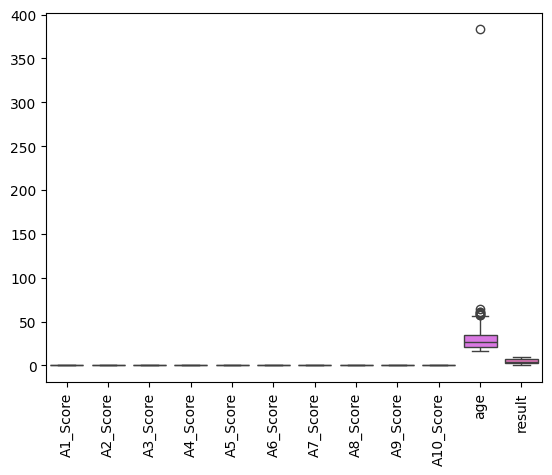

In [ ]:
sns.boxplot(df)

plt.xticks(rotation=90)

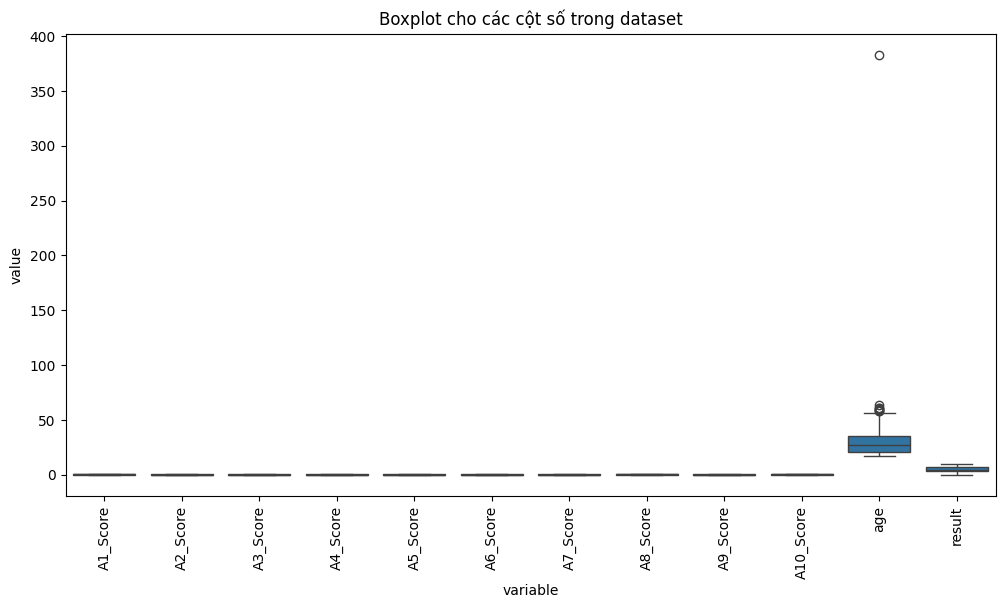

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chỉ lấy các cột số
numeric_cols = df.select_dtypes(include='number')

# Chuyển sang long-format để vẽ boxplot
df_long = pd.melt(numeric_cols)

plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_long)
plt.xticks(rotation=90)
plt.title("Boxplot cho các cột số trong dataset")
plt.show()


In [ ]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)

df = df[df["age"]<=upper_bound]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'A1_Score'),
  Text(1, 0, 'A2_Score'),
  Text(2, 0, 'A3_Score'),
  Text(3, 0, 'A4_Score'),
  Text(4, 0, 'A5_Score'),
  Text(5, 0, 'A6_Score'),
  Text(6, 0, 'A7_Score'),
  Text(7, 0, 'A8_Score'),
  Text(8, 0, 'A9_Score'),
  Text(9, 0, 'A10_Score'),
  Text(10, 0, 'age'),
  Text(11, 0, 'result')])

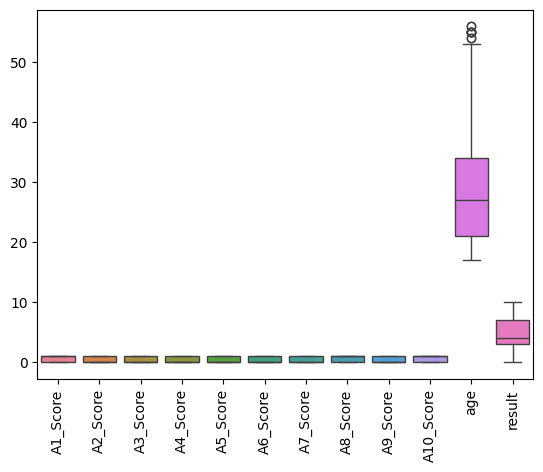

In [ ]:
sns.boxplot(df)

plt.xticks(rotation=90)

In [ ]:
df.columns.values

array(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype=object)

In [ ]:
labels=df['Class/ASD'].unique().tolist()
labels

['NO', 'YES']

In [ ]:
col_names = ['gender', 'austim', 'contry_of_res','used_app_before','age_desc', 'ethnicity','relation', 'jundice','Class/ASD' ]

lbl_enc = OrdinalEncoder()
for i in col_names:
    df[i] = lbl_enc.fit_transform(df[[i]])

<ipython-input-18-dc4c25dd4b7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = lbl_enc.fit_transform(df[[i]])
<ipython-input-18-dc4c25dd4b7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = lbl_enc.fit_transform(df[[i]])
<ipython-input-18-dc4c25dd4b7a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [ ]:
df.head(20)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,0.0,9.0,0.0,0.0,64.0,0.0,6.0,0.0,4.0,0.0
1,1,1,0,1,0,0,0,1,0,1,...,1.0,3.0,0.0,1.0,13.0,0.0,5.0,0.0,4.0,0.0
2,1,1,0,1,1,0,1,1,1,1,...,1.0,3.0,1.0,1.0,56.0,0.0,8.0,0.0,2.0,1.0
3,1,1,0,1,0,0,1,1,0,1,...,0.0,9.0,0.0,1.0,64.0,0.0,6.0,0.0,4.0,0.0
4,1,0,0,0,0,0,0,1,0,0,...,0.0,9.0,0.0,0.0,22.0,0.0,2.0,0.0,4.0,0.0
5,1,1,1,1,1,0,1,1,1,1,...,1.0,5.0,1.0,0.0,64.0,0.0,9.0,0.0,4.0,1.0
6,0,1,0,0,0,0,0,1,0,0,...,0.0,1.0,0.0,0.0,64.0,0.0,2.0,0.0,4.0,0.0
8,1,1,0,0,1,0,0,1,1,1,...,1.0,9.0,0.0,0.0,64.0,0.0,6.0,0.0,4.0,0.0
9,1,1,1,1,0,1,1,1,1,0,...,1.0,0.0,1.0,1.0,9.0,0.0,8.0,0.0,0.0,1.0
10,1,1,1,1,1,1,1,1,1,1,...,1.0,9.0,0.0,0.0,64.0,0.0,10.0,0.0,3.0,1.0


In [ ]:
labels=df['Class/ASD'].unique().tolist()
labels

[0.0, 1.0]

In [ ]:
X = df.drop("Class/ASD", axis=1)
y = df['Class/ASD']

In [ ]:
df.corr()
# Tính hệ số tương quan để chọn ra các cột tương đồng

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
A1_Score,1.000000,0.006263,0.072339,0.126835,0.167774,0.106084,0.217488,0.155845,0.142160,0.118797,...,-0.072356,0.046748,-0.020994,0.095185,0.020076,-0.040258,0.397672,NaN,0.011230,0.295717
A2_Score,0.006263,1.000000,0.219784,0.154249,0.146975,0.177015,-0.048496,0.037457,0.197418,0.064793,...,-0.050676,0.124112,0.110102,0.067852,0.138579,-0.009179,0.384965,NaN,-0.042522,0.304171
A3_Score,0.072339,0.219784,1.000000,0.405424,0.265292,0.265006,0.077819,0.021371,0.312770,0.172393,...,-0.001669,0.107638,0.060511,0.109947,0.046516,0.056968,0.552012,NaN,0.033596,0.439569
A4_Score,0.126835,0.154249,0.405424,1.000000,0.307469,0.291944,0.151544,0.011549,0.325619,0.214935,...,-0.059666,0.138649,0.063752,0.191634,0.039857,0.024363,0.586192,NaN,-0.010316,0.469032
A5_Score,0.167774,0.146975,0.265292,0.307469,1.000000,0.385127,0.232556,0.100478,0.395635,0.262117,...,-0.040143,0.006851,0.029980,0.082846,-0.024185,0.000381,0.636538,NaN,0.047400,0.531872
A6_Score,0.106084,0.177015,0.265006,0.291944,0.385127,1.000000,0.168717,0.101615,0.478079,0.291371,...,-0.084565,0.105240,0.073704,0.104616,-0.019533,0.088852,0.624682,NaN,-0.093243,0.585007
A7_Score,0.217488,-0.048496,0.077819,0.151544,0.232556,0.168717,1.000000,0.086738,0.182967,0.243685,...,0.059644,-0.006811,0.025203,-0.019287,-0.020353,-0.022764,0.450230,NaN,0.032212,0.347172
A8_Score,0.155845,0.037457,0.021371,0.011549,0.100478,0.101615,0.086738,1.000000,0.109039,0.100295,...,0.061696,-0.040726,0.006540,0.035643,-0.041116,-0.042358,0.329645,NaN,0.045067,0.241244
A9_Score,0.142160,0.197418,0.312770,0.325619,0.395635,0.478079,0.182967,0.109039,1.000000,0.279697,...,0.001061,0.073367,0.052981,0.159839,-0.079027,0.050511,0.659271,NaN,-0.050810,0.636719
A10_Score,0.118797,0.064793,0.172393,0.214935,0.262117,0.291371,0.243685,0.100295,0.279697,1.000000,...,-0.059032,0.056988,0.047218,0.110768,0.025223,-0.042747,0.535848,NaN,0.026166,0.384445


In [ ]:
from sklearn.feature_selection import mutual_info_classif

mic = mutual_info_classif(X,y)
mic
# Mức độ liên quan giữa các feature vs cột kết quả

array([0.06532609, 0.06352383, 0.09834596, 0.12984679, 0.17743054,
       0.16876288, 0.07537088, 0.01635838, 0.21157529, 0.07366835,
       0.00512582, 0.        , 0.03381571, 0.        , 0.02368075,
       0.09778305, 0.02265496, 0.5797603 , 0.02584626, 0.00734454])

In [ ]:
mic = pd.Series(mic)
mic.index = X.columns
mic.sort_values(ascending=False)
# Sắp xếp các cột theo mức độ quan trọng

,0
result,0.579760
A9_Score,0.211575
A5_Score,0.177431
A6_Score,0.168763
A4_Score,0.129847
A3_Score,0.098346
contry_of_res,0.097783
A7_Score,0.075371
A10_Score,0.073668
A1_Score,0.065326


In [ ]:
X = X.drop(['gender', 'age_desc'],axis=1)
# Xóa bỏ các cột quan trọng

KeyError: "['gender', 'age_desc'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [ ]:
#Scale the Data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain_std = scaler.fit_transform(X_train)
Xtest_std = scaler.transform(X_test)
# Có thể bỏ qua với thuật toán Decision Tree

In [ ]:
entropy_clf = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=42)

entropy_clf.fit(X_train, y_train)



DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

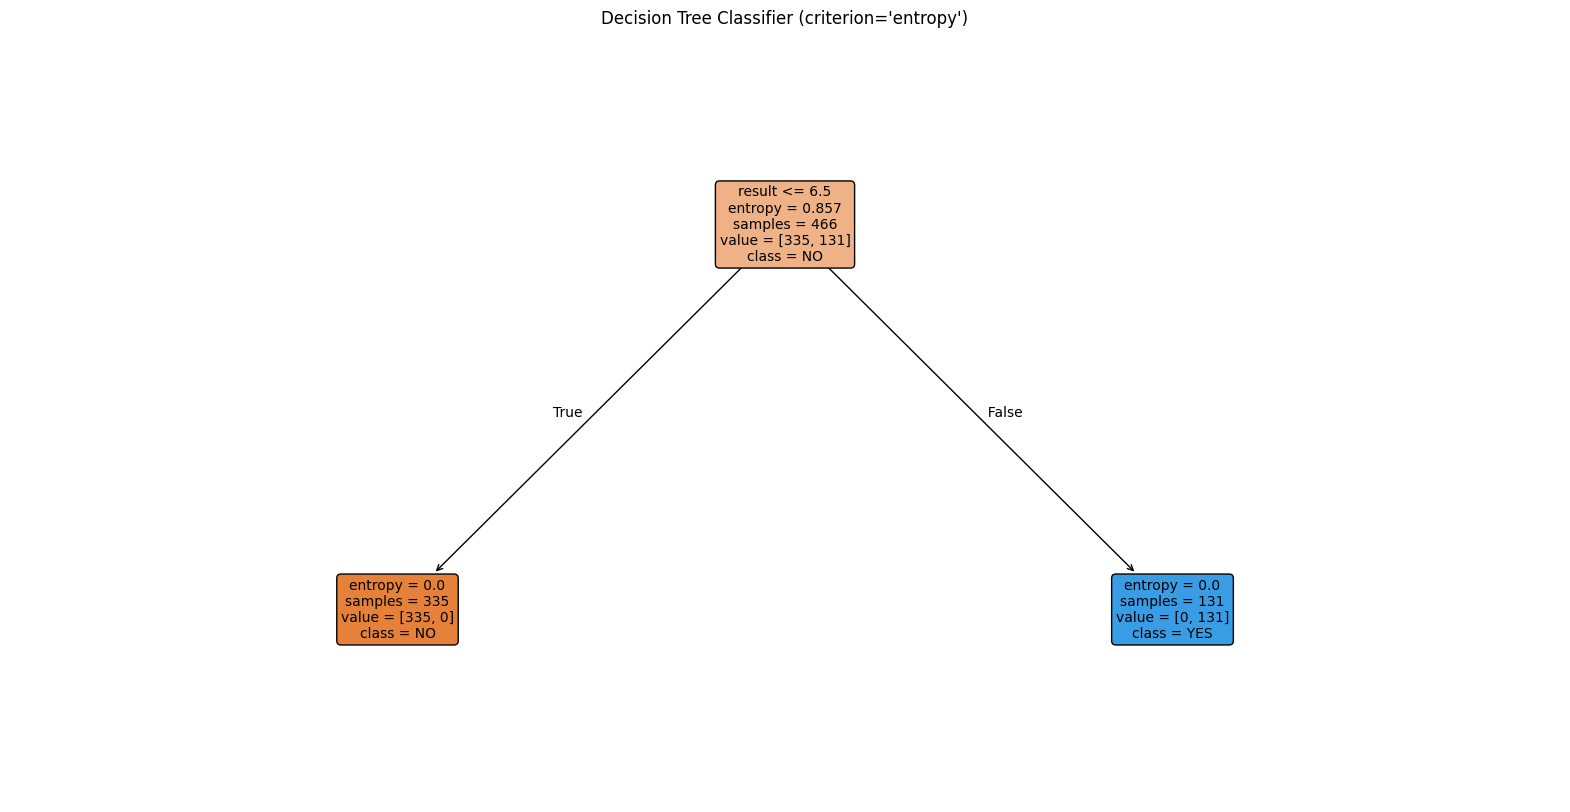

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Kích thước hình vẽ
plot_tree(
    entropy_clf,
    feature_names=X.columns,        # Tên các cột đặc trưng
    class_names=["NO", "YES"],      # Nhãn phân loại
    filled=True,                    # Tô màu các node
    rounded=True,                   # Bo tròn các góc
    fontsize=10
)
plt.title("Decision Tree Classifier (criterion='entropy')")
plt.show()


In [ ]:
print('Training Accuracy:', entropy_clf.score(X_train,y_train))
print('Test Accuracy:', entropy_clf.score(X_test,y_test))

Training Accuracy: 1.0
Test Accuracy: 1.0


In [ ]:
entropy_clf.fit(Xtrain_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
print('Training Accuracy scale:', entropy_clf.score(Xtrain_std,y_train))
print('Test Accuracy scale:', entropy_clf.score(Xtest_std,y_test))

Training Accuracy scale: 1.0
Test Accuracy scale: 1.0


Training Accuracy: 0.2788671023965142
Test Accuracy: 0.29955947136563876


c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
c:\Users\nilesh\anaconda3\envs\mllab\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


[Text(0.5, 0.75, 'x[16] <= 6.5\nentropy = 0.857\nsamples = 466\nvalue = [335, 131]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 335\nvalue = [335, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 131\nvalue = [0, 131]'),
 Text(0.625, 0.5, '  False')]

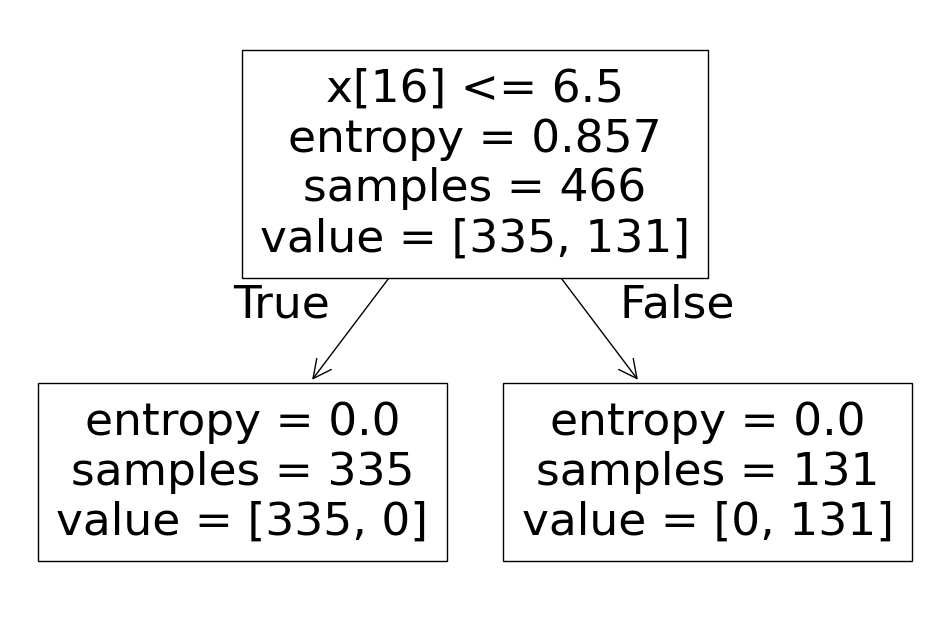

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(entropy_clf.fit(X_train, y_train))

In [ ]:
# XÂY DỰNG NEW TREE PHÂN NHÁNH VỚI 6 MỨC NGƯỠNG NGUY CƠ THÌ NÓI TRẺ CÓ THỂ MẮC TỰ KỶ

# ✅ Bước 1: Danh sách đặc trưng theo thứ tự độ quan trọng (mutual_info_classif)
priority_features = [
    'result', 'A9_Score', 'A5_Score', 'A6_Score',
    'A4_Score', 'A3_Score', 'contry_of_res', 'A7_Score',
    'A10_Score', 'A1_Score', 'A2_Score'
]

# ✅ Bước 2: Tạo bản sao an toàn của X (tránh SettingWithCopyWarning)
X_safe = X.copy()

# ✅ Bước 3: Hàm phân loại rule-based
def rule_based_asd_predict(row, min_alerts=6):
    alerts = 0
    for feat in priority_features:
        if feat == 'result':
            # Nếu tổng điểm > 6.5 → cảnh báo
            if row[feat] > 6.5:
                alerts += 1
        else:
            # Với các đặc trưng nhị phân khác → cảnh báo nếu = 1
            if row[feat] == 1:
                alerts += 1
    # Nếu đủ ngưỡng cảnh báo → dự đoán Tự kỷ (1)
    return 1 if alerts >= min_alerts else 0

# ✅ Bước 4: Áp dụng mô hình phân loại theo rule
X_safe['custom_prediction'] = X_safe.apply(rule_based_asd_predict, axis=1)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y, X_safe['custom_prediction']))
print("Accuracy:", accuracy_score(y, X_safe['custom_prediction']))


              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       511
         1.0       0.91      1.00      0.95       185

    accuracy                           0.97       696
   macro avg       0.95      0.98      0.97       696
weighted avg       0.98      0.97      0.97       696

Accuracy: 0.9727011494252874


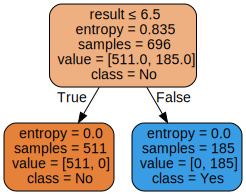

In [ ]:
# VÌ RESULT PHÂN NHÓM QUÁ MẠNH NÊN CÂY CHỈ CÓ 1 NHÁNH, CẦN LOẠI BỎ NÓ ĐI ĐỂ ĐÁNH GIÁ TIẾP CÁC GIÁ TRỊ ĐẶC TRUNG KHÁC
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz, DecisionTreeClassifier

# Lấy lại tập dữ liệu X và y (giả định df đã tồn tại với 'Class/ASD')
# Bỏ cột custom_prediction nếu đã tồn tại
X = df.drop(columns=["Class/ASD", "custom_prediction"], errors="ignore")
y = df["Class/ASD"]

# Chọn lại các feature theo mutual_info_classif đã định nghĩa
top_features = [
    'result', 'A9_Score', 'A5_Score', 'A6_Score',
    'A4_Score', 'A3_Score', 'contry_of_res', 'A7_Score',
    'A10_Score', 'A1_Score', 'A2_Score'
]

# Cắt lại X_top
X_top = X[top_features]

# Huấn luyện cây quyết định thật
tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree_clf.fit(X_top, y)

# Xuất cây dưới dạng dot
dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=top_features,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Vẽ bằng graphviz và lưu file
graph = graphviz.Source(dot_data)
graph.render("/mnt/data/tree_custom_rule_based", format="png", cleanup=False)
graph  # Trả về cây trực quan nếu hiển thị được


In [ ]:
# 1. Đọc lại dữ liệu gốc
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/KLTN/Model/Decision_Tree/autism_screening.csv')

# 2. Làm sạch nếu có giá trị '?'
import numpy as np
df.replace('?', np.nan, inplace=True)

# 3. Impute missing values (tuỳ vào các cột thực tế bạn có thể áp dụng thêm)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['age'] = imputer.fit_transform(df[['age']]).ravel()
df['ethnicity'] = imputer.fit_transform(df[['ethnicity']]).ravel()
df['relation'] = imputer.fit_transform(df[['relation']]).ravel()

# 4. Mã hóa dữ liệu bằng OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
col_names = ['gender', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'ethnicity', 'relation', 'jundice', 'Class/ASD']
encoder = OrdinalEncoder()
df[col_names] = encoder.fit_transform(df[col_names])

# 5. Tạo X, y
X = df.drop(columns=["Class/ASD"], errors="ignore")
y = df["Class/ASD"]

# 6. Chọn đặc trưng theo mutual_info_classif
top_features = [
    'result', 'A9_Score', 'A5_Score', 'A6_Score',
    'A4_Score', 'A3_Score', 'contry_of_res', 'A7_Score',
    'A10_Score', 'A1_Score', 'A2_Score'
]
X_top = X[top_features]

# 7. Huấn luyện và vẽ cây
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree_clf.fit(X_top, y)

dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=top_features,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("/mnt/data/tree_custom_rule_based", format="png", cleanup=False)
graph


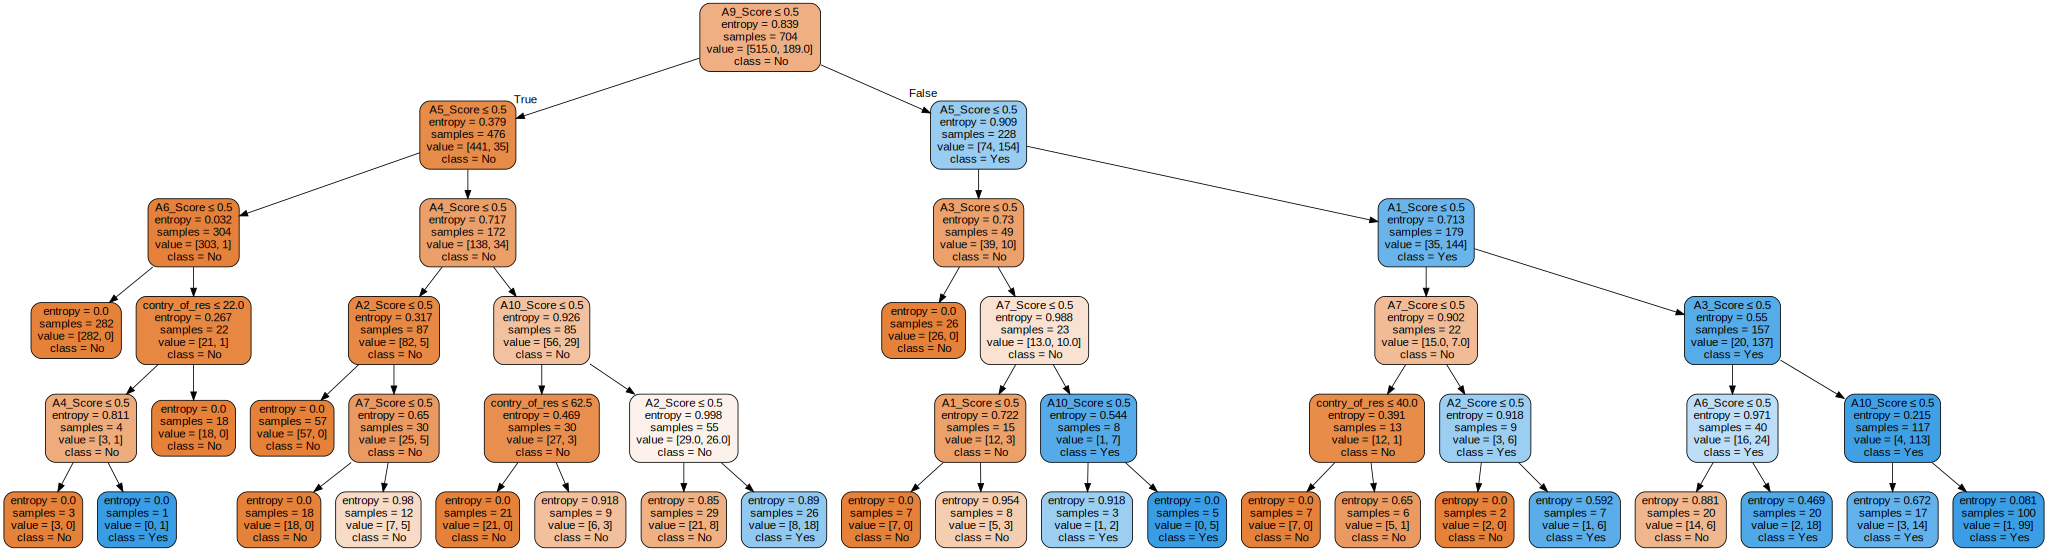

In [ ]:
# 1. Đọc dữ liệu
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/KLTN/Model/Decision_Tree/autism_screening.csv')

# 2. Làm sạch giá trị '?'
import numpy as np
df.replace('?', np.nan, inplace=True)

# 3. Điền giá trị thiếu
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='most_frequent')
for col in ['age', 'ethnicity', 'relation']:
    df[col] = imp.fit_transform(df[[col]]).ravel()

# 4. Mã hóa các cột phân loại
from sklearn.preprocessing import OrdinalEncoder
cols_to_encode = ['gender', 'austim', 'contry_of_res','used_app_before','age_desc', 'ethnicity','relation', 'jundice','Class/ASD']
enc = OrdinalEncoder()
df[cols_to_encode] = enc.fit_transform(df[cols_to_encode])

# 5. Tạo X và y
y = df["Class/ASD"]
top_features_no_result = [
    'A9_Score', 'A5_Score', 'A6_Score',
    'A4_Score', 'A3_Score', 'contry_of_res', 'A7_Score',
    'A10_Score', 'A1_Score', 'A2_Score'
]
X_top = df[top_features_no_result]

# 6. Huấn luyện cây
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
tree_clf.fit(X_top, y)

# 7. Xuất và vẽ cây
dot_data = export_graphviz(
    tree_clf,
    out_file=None,
    feature_names=top_features_no_result,
    class_names=["No", "Yes"],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
output_path = '/content/drive/MyDrive/KLTN/Model/Decision_Tree/tree_without_result.png'
graph.render(output_path, format="png", cleanup=True)
graph


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 1. Tách dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.3, random_state=42)

# 2. Huấn luyện lại trên tập huấn luyện
tree_clf.fit(X_train, y_train)

# 3. Dự đoán
y_pred = tree_clf.predict(X_test)

# 4. Đánh giá
print("Classification Report:\n")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.93       155
         1.0       0.85      0.77      0.81        57

    accuracy                           0.90       212
   macro avg       0.88      0.86      0.87       212
weighted avg       0.90      0.90      0.90       212

Accuracy: 0.9009433962264151
